In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Loading the dataset
df3 = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

In [3]:
# Displaying the first few rows of the dataset
df3.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [4]:
# Data Cleaning

# Checking for missing values
print(df3.isnull().sum())

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [5]:
# Dropping rows with missing values
df3.dropna(inplace=True)

# Dropping irrelevant columns
df3.drop(columns=['Employee_ID'], inplace=True)

In [6]:
# Data Preparation
# Convert categorical variables 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df3['Mental_Health_Condition'] = label_encoder.fit_transform(df3['Mental_Health_Condition'])
df3['Gender'] = label_encoder.fit_transform(df3['Gender'])
df3['Job_Role'] = label_encoder.fit_transform(df3['Job_Role'])
df3['Industry'] = label_encoder.fit_transform(df3['Industry'])
df3['Work_Location'] = label_encoder.fit_transform(df3['Work_Location'])
df3['Stress_Level'] = label_encoder.fit_transform(df3['Stress_Level'])
df3['Access_to_Mental_Health_Resources'] = label_encoder.fit_transform(df3['Access_to_Mental_Health_Resources'])
df3['Productivity_Change'] = label_encoder.fit_transform(df3['Productivity_Change'])
df3['Satisfaction_with_Remote_Work'] = label_encoder.fit_transform(df3['Satisfaction_with_Remote_Work'])
df3['Physical_Activity'] = label_encoder.fit_transform(df3['Physical_Activity'])
df3['Sleep_Quality'] = label_encoder.fit_transform(df3['Sleep_Quality'])

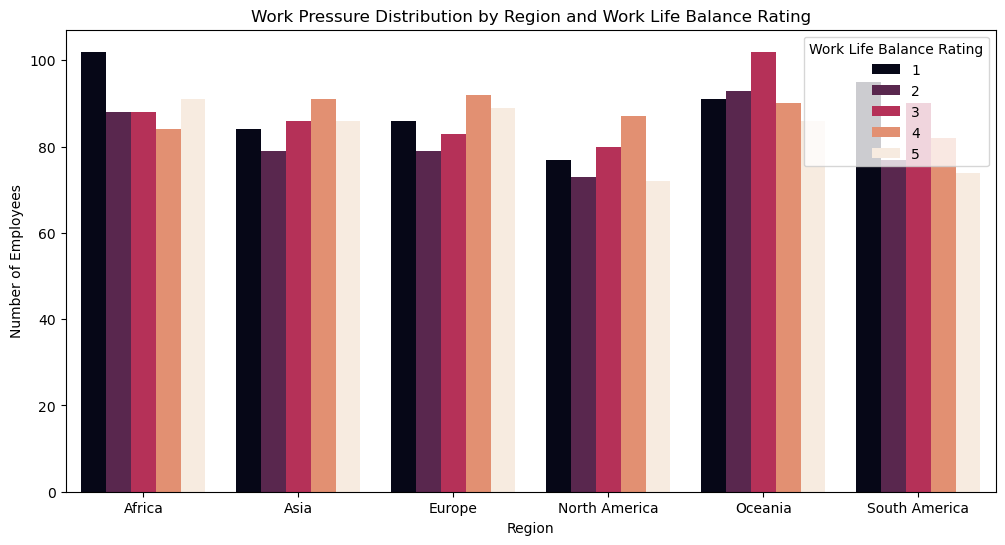

In [7]:
# Grouping the data by Region and Work_Life_Balance_Rating
work_pressure_distribution = df3.groupby(['Region', 'Work_Life_Balance_Rating']).size().unstack(fill_value=0)

# Resetting the index for plotting
work_pressure_distribution.reset_index(inplace=True)

# Making the DataFrame for easier plotting
work_pressure_melted = work_pressure_distribution.melt(id_vars='Region', var_name='Work_Life_Balance_Rating', value_name='Count')

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=work_pressure_melted, x='Region', y='Count', hue='Work_Life_Balance_Rating', palette='rocket')
plt.title('Work Pressure Distribution by Region and Work Life Balance Rating')
plt.xlabel('Region')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)  
plt.legend(title='Work Life Balance Rating')
plt.show()

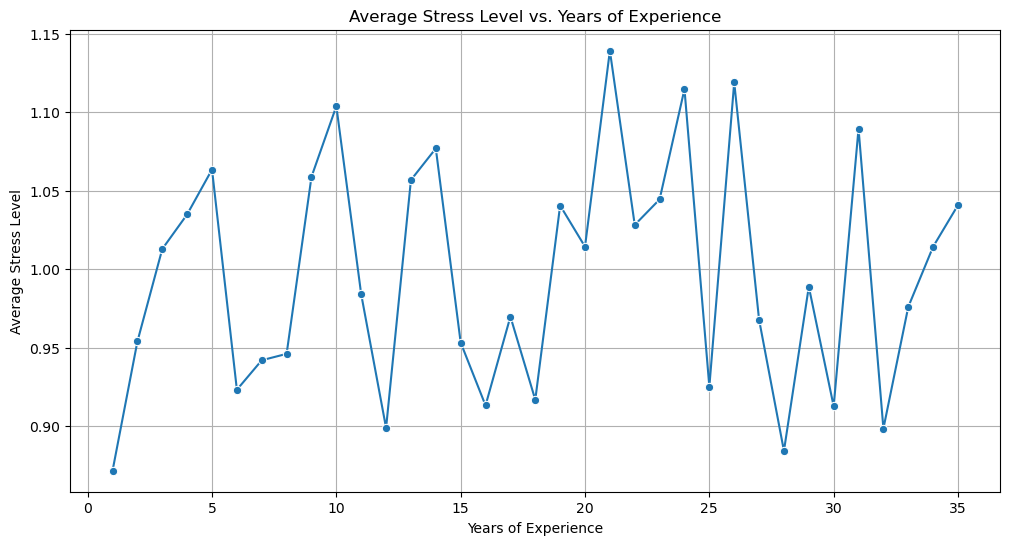

In [8]:
# Groupping the data by Years_of_Experience and calculate the average Stress_Level
average_stress = df3.groupby('Years_of_Experience')['Stress_Level'].mean().reset_index()

# Creating a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_stress, x='Years_of_Experience', y='Stress_Level', marker='o')
plt.title('Average Stress Level vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Stress Level')
plt.xticks(rotation=0) 
plt.grid()  
plt.show()

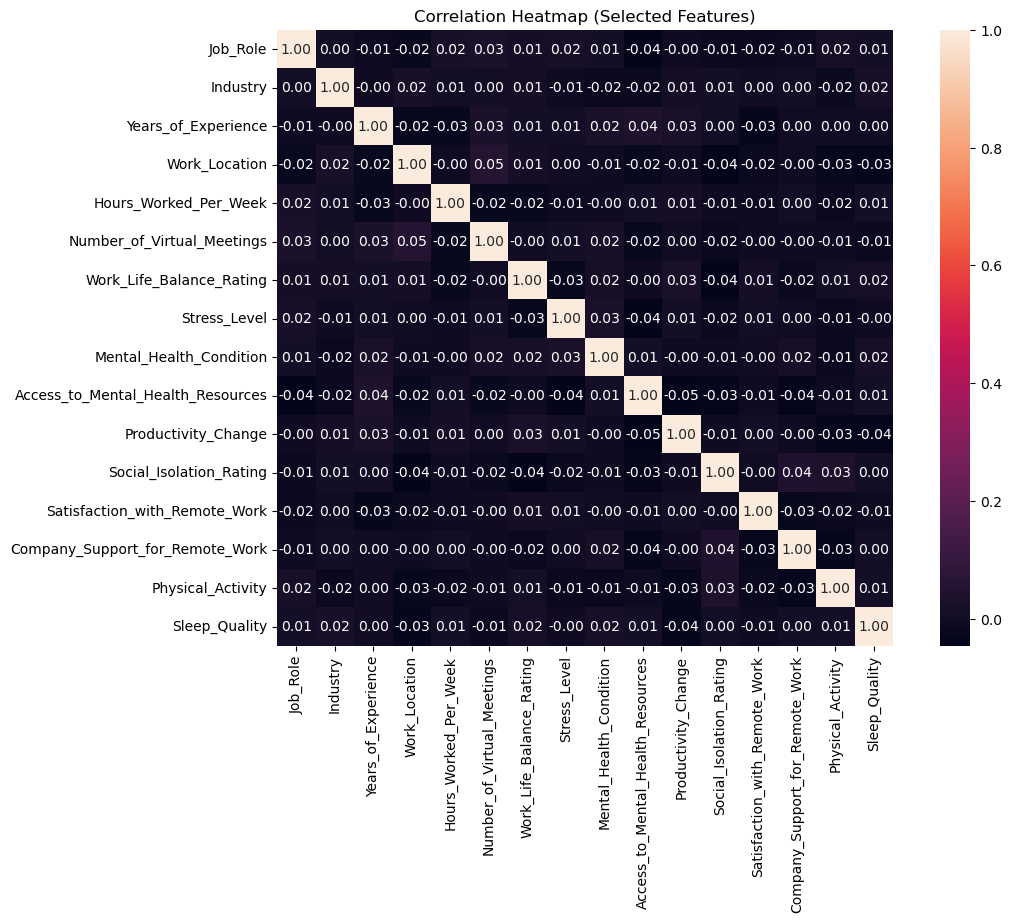

In [9]:
# Select the specific columns
selected_columns = [ 
    'Job_Role', 
    'Industry', 
    'Years_of_Experience', 
    'Work_Location', 
    'Hours_Worked_Per_Week', 
    'Number_of_Virtual_Meetings', 
    'Work_Life_Balance_Rating', 
    'Stress_Level', 
    'Mental_Health_Condition', 
    'Access_to_Mental_Health_Resources', 
    'Productivity_Change', 
    'Social_Isolation_Rating', 
    'Satisfaction_with_Remote_Work', 
    'Company_Support_for_Remote_Work', 
    'Physical_Activity', 
    'Sleep_Quality'
]

# Filter the data to include only the selected columns
df_selected = df3[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='rocket', square=True)
plt.title('Correlation Heatmap (Selected Features)')
plt.show()

In [10]:
# Additional Statistics
df3.describe()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality
count,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000
mean,40.910749,1.480404,3.009701,3.061700,17.760574,1.022119,39.634459,7.446643,2.985642,0.997672,0.972449,0.489329,0.995343,3.004269,1.006985,3.001552,0.525805,0.997672
std,11.258183,1.119987,2.003952,1.976884,9.981957,0.818967,11.886100,4.592684,1.413454,0.819499,0.817378,0.499983,0.829845,1.388304,0.810422,1.394866,0.499431,0.816652
min,22.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,31.000000,0.000000,1.000000,1.000000,9.000000,0.000000,29.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,41.000000,1.000000,3.000000,3.000000,18.000000,1.000000,39.000000,7.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000
75%,51.000000,2.000000,5.000000,5.000000,26.000000,2.000000,50.000000,11.000000,4.000000,2.000000,2.000000,1.000000,2.000000,4.000000,2.000000,4.000000,1.000000,2.000000
max,60.000000,3.000000,6.000000,6.000000,35.000000,2.000000,60.000000,15.000000,5.000000,2.000000,2.000000,1.000000,2.000000,5.000000,2.000000,5.000000,1.000000,2.000000
